In [1]:
import json
import os
from os import listdir
from os.path import isfile, join
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tabulate
import numpy as np
import math

import re

from itertools import cycle, islice

# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

from scipy.stats import pearsonr

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [2]:
fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
    'lines.linewidth': 2
}

matplotlib.rcParams.update(params)

In [3]:
data_dir = 'aggregated_data'
out_dir = 'aggregated_data/stats'


# appname = 'LUBM'
# data_size_dir = 'LUBM'
# collections = ['schemex', 'attribute', 'type']
# suffix = ''
# hide_legend = False

appname = 'BSBM'
data_size_dir = 'BSBM'
collections =['schemex', 'attribute', 'type']
suffix = ''
hide_legend = True

# appname = 'dyldo_y2019_core'
# data_size_dir = 'DyLDO-core'
# collections =['schemex', 'attribute', 'type']
# suffix = '-test-1_clean'
# hide_legend = True

# appname = 'dyldo_y2019_full'
# data_size_dir = 'DyLDO-ext'
# collections =['schemex', 'attribute', 'type']
# suffix = ''
# hide_legend = True

,avg_degree,std_degree,max_degree,avg_indegree,std_indegree,max_indegree,avg_outdegree,std_outdegree,max_outdegree
Iteration,,,,,,,,,
0,6.574178,49.946395,4845,3.657418,52.248797,4839,9.227893,5.133100,56
1,7.383289,98.924871,16165,4.172195,104.949010,16165,9.552017,4.615398,53
2,7.645884,131.143641,32174,4.340923,139.574271,32174,9.706528,4.713856,55
3,7.686617,155.909392,48144,4.367987,166.067253,48144,9.679494,4.713855,57
4,7.825035,178.282521,64196,4.458558,190.189758,64196,9.757351,4.704418,57
5,7.922212,198.069670,80198,4.522958,211.535980,80198,9.803977,4.688418,57
6,7.999724,216.486538,96177,4.574591,231.411965,96177,9.835699,4.676781,57
7,8.065914,233.544272,112248,4.618687,249.830557,112248,9.858352,4.670737,57
8,8.124582,249.674703,128227,4.657825,267.257930,128227,9.875576,4.664109,57


8.054401210305048

0.4525295841279653

4.6124025670783855

0.2947669255065318

9.797779660252875

0.1567877459593469

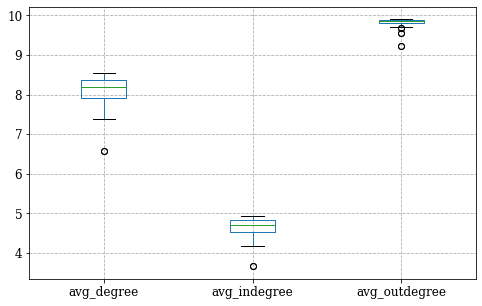

In [4]:
curr_dir = join(data_dir, data_size_dir)
onlyfiles = [f for f in listdir(curr_dir) if isfile(join(curr_dir, f)) and f.endswith(".csv")]
onlyfiles.sort(key=natural_keys)

degree_frame = pd.DataFrame()
i = 0
for filename in onlyfiles:
    with open(os.path.join(curr_dir, filename), 'r') as f:
        df = pd.read_csv(f, sep=',')
        if 'iteration' in filename:
            iteration = filename.replace('iteration', '')
            iteration = iteration.replace('-', '')
            iteration = iteration.replace('degree.csv', '')
            iteration = iteration.replace('.gz', '')
            iteration = iteration.replace('.nq', '')
            iteration = iteration.replace('.nt', '')
            i = int(iteration)
        else:
            i = i + 1

        df['Iteration'] = i
        df = df.set_index('Iteration')
        if degree_frame.empty:
            degree_frame = df
        else:
            degree_frame = degree_frame.append(df)

#plot = degree_frame['max_degree'].plot()  
if appname == 'dyldo_y2019_core':
    degree_frame = degree_frame.drop(degree_frame.index[[21,22]])


if appname == 'dyldo_y2019_full':
    degree_frame = degree_frame.head()
    iterations = 5
    ticks = 1.0
    print('drop the beat')

display(degree_frame)

boxplot = degree_frame.boxplot(column=['avg_degree', 'avg_indegree', 'avg_outdegree']) 

plt.savefig(out_dir + '/' + data_size_dir + '-degree.png', bbox_inches = 'tight')

display(degree_frame['avg_degree'].mean())
display(degree_frame['avg_degree'].std())

display(degree_frame['avg_indegree'].mean())
display(degree_frame['avg_indegree'].std())

display(degree_frame['avg_outdegree'].mean())
display(degree_frame['avg_outdegree'].std())


In [5]:
# The main correlation analysis

appnames = ['LUBM', 'BSBM', 'dyldo_y2019_core', 'dyldo_y2019_full']
datasets = ['LUBM', 'BSBM', 'DyLDO-core', 'DyLDO-ext']
models = ['schemex', 'attribute', 'type']


size_frame = pd.DataFrame(columns=['dataset', 'edges', 'types', 'bytes'])

index = 0
for dataset in datasets:
    curr_dir = join(data_dir, dataset)
    onlyfiles = [f for f in listdir(curr_dir) if isfile(join(curr_dir, f)) and f.endswith(".txt")]
    onlyfiles.sort(key=natural_keys)


    temp_frame = pd.DataFrame(columns=['dataset', 'edges', 'types', 'bytes', 'degree'])
    i = 0
    for filename in onlyfiles:
        f = open(join(curr_dir,filename), 'r')
        f_degree = open(join(curr_dir,filename.replace(".txt", "-degree.csv")), 'r')
        content = f.read().split('\n')

        df = pd.read_csv(f_degree, sep=',')
        df['Iteration'] = i
        df = df.set_index('Iteration')

        types = int(content[0])
        edges = int(content[1])
        bytez = int(content[2])
        degree = df['avg_degree'].values[0]

        if 'iteration' in filename:
            iteration = filename.replace('iteration', '')
            iteration = iteration.replace('-', '')
            iteration = iteration.replace('.txt', '')
            iteration = iteration.replace('.gz', '')
            iteration = iteration.replace('.nq', '')
            iteration = iteration.replace('.nt', '')
            i = int(iteration)
        else:
            i = i + 1
        temp_frame.loc[i] = [dataset, edges, types, bytez, degree]
        

    
    for model in models:
        f_space = open(os.path.join(data_dir, appnames[index] + '_'+model+'-update-time-and-space.csv'), 'r')
        #print(f_space)
        sf = pd.read_csv(f_space, sep=',')
        sf = sf.set_index('Iteration')
        #display(sf)
        temp_frame[model+'-summarization-ratio'] = sf['Imprint links'] / sf['Schema Elements (SE)']
        temp_frame[model+'VHI'] = sf['Sec. Index Size (bytes)']
        temp_frame[model+'-compression'] = temp_frame[model+'VHI'] / temp_frame['bytes']
        if 'instances' not in temp_frame:
            temp_frame['instances'] = sf['Imprint links']
        f_time = open(os.path.join(data_dir, appnames[index] + '_'+model+'-performance.csv'), 'r')
        #print(f_time)
        tf = pd.read_csv(f_time, sep=',')
        tf = tf.set_index('Iteration')
        #display(tf)
        temp_frame[model+'schema-computation'] = tf['Schema Computation']
        temp_frame[model+'update'] = tf['Updates']
        temp_frame[model+'incremental'] = tf['Total']
        temp_frame[model+'batch'] = tf['Batch']
        temp_frame[model+'speed-up'] = tf['Batch'] / tf['Total']

        
        f_change = open(os.path.join(data_dir, appnames[index] + '_'+model+'-changes.csv'), 'r')
        cf = pd.read_csv(f_change, sep=',')
        temp_frame[model+':changes'] = cf['ChangedSchemaStructures (SE_mod)'] +  ((sf['Imprint links'] - sf['Imprint links'].shift(1,fill_value=0)).abs())
        temp_frame[model+':updates'] = cf['NewlyObservedSchema (SE_new)'] + cf['DeletedSchemaStructures (SE_del)']
        temp_frame[model+':change-update-ratio'] = temp_frame[model+':changes']/(temp_frame[model+':updates'] + 1)
        

    if dataset == 'DyLDO-core':
        temp_frame = temp_frame.drop(temp_frame.index[[20,21]])
    if dataset == 'DyLDO-ext':
        temp_frame = temp_frame.head(5)
        
    if size_frame.empty:
        size_frame = temp_frame
    else:
        size_frame = size_frame.append(temp_frame)
        
  
    index = index + 1

size_frame.to_csv(out_dir + '/' + 'correlation-stats.csv', sep=',', encoding='utf-8')

display(size_frame.head())
for model in models:
    print("Summarization Ratio ({}): ".format(model))
    print("\tMean:\t {}".format(size_frame[model+'-summarization-ratio'].mean()))
    print("\tStd:\t {}".format(size_frame[model+'-summarization-ratio'].std()))
    print("\tMin:\t {}".format(size_frame[model+'-summarization-ratio'].min()))
    print("\tMAX:\t {}".format(size_frame[model+'-summarization-ratio'].max()))

    print("Change-Update Ratio ({}): ".format(model))
    print("\tMean:\t {}".format(size_frame[model+':change-update-ratio'].mean()))
    print("\tStd:\t {}".format(size_frame[model+':change-update-ratio'].std()))
    print("\tMin:\t {}".format(size_frame[model+':change-update-ratio'].min()))
    print("\tMAX:\t {}".format(size_frame[model+':change-update-ratio'].max()))
    
    print("Incremental Time ({}): ".format(model))
    print("\tMean:\t {}".format(size_frame[model+'incremental'].mean()))
    print("\tStd:\t {}".format(size_frame[model+'incremental'].std()))
    print("\tMin:\t {}".format(size_frame[model+'incremental'].min()))
    print("\tMAX:\t {}".format(size_frame[model+'incremental'].max()))
    
    print("Batch Time ({}): ".format(model))
    print("\tMean:\t {}".format(size_frame[model+'batch'].mean()))
    print("\tStd:\t {}".format(size_frame[model+'batch'].std()))
    print("\tMin:\t {}".format(size_frame[model+'batch'].min()))
    print("\tMAX:\t {}".format(size_frame[model+'batch'].max()))
    
    print("Speed-up Time ({}): ".format(model))
    print("\tMean:\t {}".format(size_frame[model+'speed-up'].mean()))
    print("\tStd:\t {}".format(size_frame[model+'speed-up'].std()))
    print("\tMin:\t {}".format(size_frame[model+'speed-up'].min()))
    print("\tMAX:\t {}".format(size_frame[model+'speed-up'].max()))
    print("-----------")
    
# display(size_frame)
# print('schemex')
# display(size_frame['attribute-compression'])
# print(size_frame['schemex-compression'].mean())
# print(size_frame['schemex-compression'].std())

# print('attribute')
# print(size_frame['attribute-compression'].mean())
# print(size_frame['attribute-compression'].std())

# print('type')
# print(size_frame['type-compression'].mean())
# print(size_frame['type-compression'].std())

,dataset,edges,types,bytes,degree,schemex-summarization-ratio,schemexVHI,schemex-compression,instances,schemexschema-computation,...,typeVHI,type-compression,typeschema-computation,typeupdate,typeincremental,typebatch,typespeed-up,type:changes,type:updates,type:change-update-ratio
0,LUBM,11096695,2308688,113341389,6.724367,6433.814925,45199685.0,0.398792,2155328.0,99282.0,...,44601072.0,0.393511,91296.0,286483.0,1747804.0,1810321.0,1.035769,2155328.0,53.0,39913.481481
1,LUBM,10971370,2285287,112199571,6.722140,6370.911243,45620382.0,0.4066,2153368.0,103351.0,...,44452058.0,0.396187,86738.0,283538.0,1728500.0,1798127.0,1.040282,133216.0,13.0,9515.428571
2,LUBM,10956090,2282653,112119291,6.720666,6372.832845,45787050.0,0.408378,2173136.0,99175.0,...,44578564.0,0.397599,89074.0,301528.0,1762553.0,1798543.0,1.020419,162211.0,6.0,23173.000000
3,LUBM,11074551,2302963,113368625,6.723471,6239.345821,45492927.0,0.401283,2165053.0,106023.0,...,44263304.0,0.390437,89766.0,299694.0,1754082.0,1797228.0,1.024597,139544.0,9.0,13954.400000
4,LUBM,11017277,2294578,112795019,6.720081,6357.523392,45407655.0,0.402568,2174273.0,99883.0,...,44251960.0,0.392322,95995.0,291634.0,1749196.0,1841167.0,1.052579,136981.0,8.0,15220.111111


Summarization Ratio (schemex): 
	Mean:	 648.9805429163321
	Std:	 1893.75920995752
	Min:	 18.387952127659574
	MAX:	 6624.530487804878
Change-Update Ratio (schemex): 
	Mean:	 893.7567911776042
	Std:	 1730.7821501102974
	Min:	 3.456093868281605
	MAX:	 7483.777777777777
Incremental Time (schemex): 
	Mean:	 2769599.298076923
	Std:	 5999182.217557423
	Min:	 20373.0
	MAX:	 34317548.0
Batch Time (schemex): 
	Mean:	 4361677.0
	Std:	 7854604.827817119
	Min:	 14895.0
	MAX:	 45877172.0
Speed-up Time (schemex): 
	Mean:	 1.8421929265515424
	Std:	 0.6917811730581307
	Min:	 0.3835358945308477
	MAX:	 2.9622230816076853
-----------
Summarization Ratio (attribute): 
	Mean:	 11361.286641510074
	Std:	 22675.685617805222
	Min:	 104.05656379548596
	MAX:	 83271.26923076923
Change-Update Ratio (attribute): 
	Mean:	 19533.66085487352
	Std:	 30070.96229391589
	Min:	 3.1671168129642133
	MAX:	 155093.5
Incremental Time (attribute): 
	Mean:	 2314293.778846154
	Std:	 4797107.954405954
	Min:	 14573.0
	MAX:	 30184395.

In [7]:
tmp = size_frame[['edges', 'schemexschema-computation', 'attributeschema-computation', 'typeschema-computation']]
# display(tmp.head())
# display(tmp.astype('float64').corr())

full_frame = pd.DataFrame(columns=['vertices', 'edges', 'vertexHashIndex', 'schema-computation'])
full_frame['vertices'] = size_frame['instances'].append(size_frame['instances']).append(size_frame['instances'])
full_frame['edges'] = size_frame['edges'].append(size_frame['edges']).append(size_frame['edges'])
full_frame['vertexHashIndex'] = size_frame['schemexVHI'].append(size_frame['attributeVHI']).append(size_frame['typeVHI'])
full_frame['schema-computation'] = size_frame['schemexschema-computation'].append(size_frame['attributeschema-computation']).append(size_frame['typeschema-computation'])
display(full_frame)


print("Do edges correlate with schema-computation?")
corrtest = pearsonr(full_frame['edges'], full_frame['schema-computation'])  
display(corrtest)


print("Do vertices correlate with vertexHashIndex?")
corrtest = pearsonr(full_frame['vertices'], full_frame['vertexHashIndex'])  
display(corrtest)


# print("Do edges correlate with vertexHashIndex?")
# corrtest = pearsonr(full_frame['edges'], full_frame['vertexHashIndex'])  
# display(corrtest)
# corrtest = pearsonr(size_frame['edges'], size_frame['attributeschema-computation'])  
# display(corrtest)

# corrtest = pearsonr(size_frame['edges'], size_frame['typeschema-computation'])  
# display(corrtest)

display(full_frame['vertexHashIndex'].mean())

,vertices,edges,vertexHashIndex,schema-computation
0,2155328.0,11096695,45199685.0,99282.0
1,2153368.0,10971370,45620382.0,103351.0
2,2173136.0,10956090,45787050.0,99175.0
3,2165053.0,11074551,45492927.0,106023.0
4,2174273.0,11017277,45407655.0,99883.0
...,...,...,...,...
1,7509702.0,82221979,251675361.0,323189.0
2,7064987.0,82245640,254293901.0,306093.0
3,10592783.0,82381421,355904489.0,432150.0
4,10440827.0,106491385,356311468.0,409007.0


Do edges correlate with schema-computation?


(0.9446845973169957, 3.919391911889589e-152)

Do vertices correlate with vertexHashIndex?


(0.9520292114312623, 1.794346781258964e-161)

66289336.96634615

array([[37.16306026]])

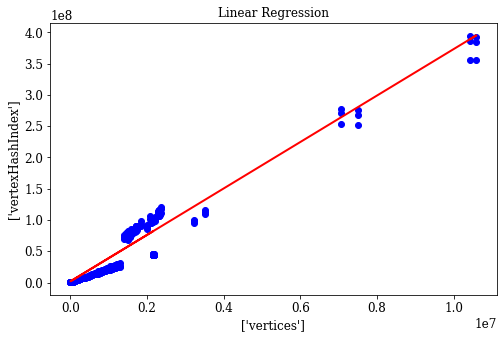

0.9006196350547053

In [11]:
x_values = ['edges'] #'change-ratio'
y_value = ['schema-computation']


x_values = ['vertices'] #'change-ratio'
y_value = ['vertexHashIndex']

#x_values = ['edges'] #'change-ratio'
#y_value = ['vertexHashIndex']

X = full_frame[x_values].values # , 'change-ratio'
y = full_frame[y_value].values

#display(X)

lin = LinearRegression() 
a = [v[0] for v in X]
#b = [v[1] for v in X]
#display(a)
lin.fit(X, y) 
display(lin.coef_)
# Visualising the Linear Regression results 
plt.scatter(a, y, color = 'blue') 
#plt.scatter(b, y, color = 'green') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel(x_values) 
plt.ylabel(y_value) 

plt.show() 
lin.score(X, y)


In [12]:
change_frame = pd.DataFrame(columns=['SE-ADD', 'SE-DEL','SE-MOD', 'SE-unchanged', 
                                     'instances', 'stability-ratio', 'change-ratio', 
                                     'update-ratio'])
iterations = 0

for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-changes.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        
        iterations = max(iterations, len(df))
        f2 = open(os.path.join(data_dir, appname + '_'+collection+suffix+'-update-time-and-space.csv'), 'r')
        df2 = pd.read_csv(f2, sep=',')
        df2.head()
        
        df2['Imprint links add-del'] = (df2['Imprint links'] - df2['Imprint links'].shift(1,fill_value=0)).abs()

        
        del df['TotalNumberOfNewInstances'] 
        del df['InstanceAddedWithKnownSchema (PE_add)']
        del df['InstancesDeleted (PE_del)']
        del df['ChangedSchemaStructuresBecauseOfNeighbor'] 
        del df['PayloadEntriesAdded'] 
        del df['PayloadEntriesRemoved'] 
        del df['InstanceToSchemaLinksAdded'] 
        del df['InstanceToSchemaLinksRemoved'] 
        del df['TotalNumberOfChangedPayloadElements (real PE_mod)']
        del df['TotalNumberOfSchemaElementsWritten']

        del df['TotalNumberOfSchemaElementsDeleted']
        df = df.set_index('Iteration')
        
        df.columns = ['SE-ADD', 'SE-DEL','SE-MOD', 'SE-unchanged']
        df['instances'] = df2['Imprint links']
        df['stability-ratio'] = df['SE-unchanged'] / df['instances']
        df['add_del-ratio'] = (df['instances'] - df['SE-MOD'] - df['SE-unchanged'] ) / df['instances']

        
        change_frame.loc[collection+':min'] = df.min()
        change_frame.loc[collection+':max'] = df.max()
        change_frame.loc[collection+':mean'] = df.mean()
        change_frame.loc[collection+':std'] = df.std()
        

change_frame.to_csv(out_dir + '/' + appname + '-stats-changes.csv', sep=',', encoding='utf-8')
display(change_frame)

,SE-ADD,SE-DEL,SE-MOD,SE-unchanged,instances,stability-ratio,change-ratio,update-ratio
schemex:min,55.000000,0.000000,0.000000e+00,0.000000e+00,7.328000e+03,0.000000,NaN,NaN
schemex:max,15783.000000,15783.000000,1.137776e+06,8.540800e+04,1.286066e+06,0.153930,NaN,NaN
schemex:mean,1929.146341,1920.317073,5.577581e+05,4.164766e+04,6.307161e+05,0.067169,NaN,NaN
schemex:std,3576.659821,3581.069257,3.575101e+05,2.631619e+04,3.844458e+05,0.024261,NaN,NaN
attribute:min,0.000000,0.000000,0.000000e+00,0.000000e+00,7.328000e+03,0.000000,NaN,NaN
attribute:max,48.000000,4.000000,1.052500e+04,1.222984e+06,1.286066e+06,0.999997,NaN,NaN
attribute:mean,2.097561,0.926829,9.704146e+02,5.983810e+05,6.307161e+05,0.889351,NaN,NaN
attribute:std,7.439102,1.170262,2.683956e+03,3.816974e+05,3.844458e+05,0.217102,NaN,NaN
type:min,0.000000,0.000000,0.000000e+00,0.000000e+00,7.328000e+03,0.000000,NaN,NaN
type:max,513.000000,513.000000,3.002100e+04,1.222984e+06,1.286066e+06,0.999997,NaN,NaN


In [5]:
performance_frame = pd.DataFrame(columns=['Load Graph', 'Parse Graph', 'Partition Graph', 'Schema Computation',
       'Updates', 'Total', 'Batch', 'Seepdup'])

for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-performance.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()

        df = df.set_index('Iteration')
        print(collection)
#         del df['Load Graph']
#         del df['Parse Graph']
#         del df['Partition Graph']
#         del df['Schema Computation']
#         del df['Updates']
#        df.columns = [collection + '-Inc', collection + '-Batch']    
        convert = lambda x: x / 1000 / 60
        df = df.applymap(convert)  
        df['Seepdup'] = df.Batch / df.Total
        display(df)
        performance_frame.loc[collection+':min'] = df.min()
        performance_frame.loc[collection+':max'] = df.max()
        performance_frame.loc[collection+':mean'] = df.mean()
        performance_frame.loc[collection+':std'] = df.std()
display(performance_frame)
performance_frame.to_csv(out_dir + '/' + appname + '-stats-performance.csv', sep=',', encoding='utf-8')

    
    
# df = pd.concat(frames, sort=False)
# df.columns = ['SchemEX:Incr', 'SchemEX:Batch', 
#              'AttrColl:Incr', 'AttrColl:Batch',
#              'TypeColl:Incr', 'TypeColl:Batch']
# print(df)
    


schemex


,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch,Seepdup
Iteration,,,,,,,,
0,48.339033,1.361433,88.273600,4.370850,426.881917,569.226833,544.904683,0.957272
1,44.523233,47.967067,43.631633,5.767717,383.910533,525.800183,670.375833,1.274963
2,45.087217,48.860717,44.260833,6.759617,253.822267,398.790650,573.716283,1.438640
3,62.985617,67.801750,61.424533,8.441383,406.815300,607.468583,NaN,NaN


attribute


,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch,Seepdup
Iteration,,,,,,,,
0,46.082183,44.019783,50.424983,4.117333,373.157917,517.802200,NaN,NaN
1,48.467550,42.716983,46.318300,4.558967,262.715150,404.776950,NaN,NaN
2,49.083967,43.589750,47.343567,4.148267,140.049133,284.214683,NaN,NaN
3,59.054800,69.637717,64.793617,8.965800,232.876317,435.328250,NaN,NaN
4,75.715333,70.114217,63.538183,6.591050,287.114467,503.073250,NaN,NaN
5,50.980417,1.528633,91.290100,5.768217,120.931983,270.499350,NaN,NaN
6,64.410750,1.717300,115.263917,6.803667,249.268550,437.464183,NaN,NaN
7,57.749250,66.597233,63.385083,5.269167,277.985650,470.986383,NaN,NaN
8,69.000700,2.226833,121.186933,6.960350,314.935233,514.310050,NaN,NaN


type


,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch,Seepdup
Iteration,,,,,,,,
0,88.113083,94.921717,97.801533,8.414817,17.796733,307.047883,1049.751150,3.418852
1,42.534617,44.774867,50.117233,5.386483,10.258183,153.071383,923.539683,6.033392
2,43.700600,49.698750,47.989683,5.101550,9.530167,156.020750,945.836300,6.062247
3,69.774800,2.178533,125.777767,7.202500,14.265950,219.199550,1576.011700,7.189849
4,59.194800,68.147783,67.869050,6.816783,12.787933,214.816350,NaN,NaN


,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch,Seepdup
schemex:min,44.523233,1.361433,43.631633,4.370850,253.822267,398.790650,544.904683,0.957272
schemex:max,62.985617,67.801750,88.273600,8.441383,426.881917,607.468583,670.375833,1.438640
schemex:mean,50.233775,41.497742,59.397650,6.334892,367.857504,525.321563,596.332267,1.223625
schemex:std,8.665965,28.277728,20.941341,1.712391,78.024198,90.712195,65.721872,0.244756
attribute:min,46.082183,1.528633,46.318300,4.117333,120.931983,270.499350,NaN,NaN
attribute:max,75.715333,70.114217,124.760567,8.965800,373.157917,517.802200,NaN,NaN
attribute:mean,58.936447,34.511942,78.830525,6.053515,239.499462,417.831890,NaN,NaN
attribute:std,10.258256,29.761057,31.466150,1.568842,83.433788,91.830193,NaN,NaN
type:min,42.534617,2.178533,47.989683,5.101550,9.530167,153.071383,923.539683,3.418852
type:max,88.113083,94.921717,125.777767,8.414817,17.796733,307.047883,1576.011700,7.189849


In [6]:
curr_dir = join(data_dir, data_size_dir)
onlyfiles = [f for f in listdir(curr_dir) if isfile(join(curr_dir, f)) and f.endswith(".txt")]
onlyfiles = sorted(onlyfiles)

edgecounts = {}
tmp = 0
for filename in onlyfiles:
    # first line: number of types in dataset (not unique)
    # second line: number of edges in dataset (not unique)
    f = open(join(curr_dir,filename), 'r')
    content = f.read().split('\n')
    if len(content) > 2:
        edges = int(content[1])
    else:
        edges = int(content[0])
    if 'iteration' in filename:
        iteration = filename.replace('iteration', '')
        iteration = iteration.replace('-', '')
        iteration = iteration.replace('.txt', '')
        iteration = iteration.replace('.gz', '')
        iteration = iteration.replace('.nq', '')
        iteration = iteration.replace('.nt', '')
               
        edgecounts[int(iteration)] = edges
    else:
        edgecounts[tmp] = edges
        tmp = tmp + 1
        
edgeframe = pd.DataFrame.from_dict(edgecounts, orient='index')
edgeframe = pd.DataFrame.sort_index(edgeframe)
#display(edgeframe)


In [7]:
size_frame = pd.DataFrame(columns= ['SE links', 'Imprint links', 'Schema Elements (SE)',
       'Schema Relations (SR)', 'summarization-ratio'])

for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-update-time-and-space.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()

        del df['SecondaryIndex Read time (ms)']
        del df['SecondaryIndex Write time (ms)']
        del df['SecondaryIndex Del time (ms)']
        #--->
        del df['SecondaryIndex Total time (ms)']
        #<----
        # number of primary vertices
        #del df['SE links']
#         if not size_frame.empty:
#             del df['Imprint links']
        del df['Checksum links']
        #del df['Schema Elements (SE)']
        #del df['Schema Relations (SR)']

        del df['SG Read time (ms)']
        del df['SG Write time (ms)']
        del df['SG Del time (ms)']

        del df['Sec. Index Size (bytes)']
        del df['Index Size (bytes)']
        del df['Graph Size (bytes)']
        #print(df)
        df = df.set_index('Iteration')
        print(df.columns)
        size_frame.loc[collection+':min'] = df.min()
        size_frame.loc[collection+':max'] = df.max()
        size_frame.loc[collection+':mean'] = df.mean()
        size_frame.loc[collection+':std'] = df.std()
        size_frame['summarization-ratio'] = size_frame['Imprint links'] / size_frame['SE links']
        


display(size_frame)
size_frame.to_csv(out_dir + '/' + appname + '-stats-size.csv', sep=',', encoding='utf-8')

Index(['SE links', 'Imprint links', 'Schema Elements (SE)',
       'Schema Relations (SR)'],
      dtype='object')
Index(['SE links', 'Imprint links', 'Schema Elements (SE)',
       'Schema Relations (SR)'],
      dtype='object')
Index(['SE links', 'Imprint links', 'Schema Elements (SE)',
       'Schema Relations (SR)'],
      dtype='object')


,SE links,Imprint links,Schema Elements (SE),Schema Relations (SR),summarization-ratio
schemex:min,223527.000000,7.064987e+06,232568.000000,1.303004e+06,31.606862
schemex:max,240311.000000,1.059278e+07,249690.000000,1.413855e+06,44.079476
schemex:mean,232387.750000,8.109854e+06,241487.750000,1.364106e+06,34.897940
schemex:std,6998.039124,1.665229e+06,7119.915092,5.432989e+04,237.956484
attribute:min,49025.000000,6.382958e+06,49026.000000,6.824230e+05,130.198021
attribute:max,56387.000000,1.059278e+07,56388.000000,8.004190e+05,187.858602
attribute:mean,53187.100000,8.935584e+06,53188.100000,7.513752e+05,168.002843
attribute:std,2466.139694,1.659412e+06,2466.139694,4.039585e+04,672.878422
type:min,31194.000000,7.064987e+06,31194.000000,0.000000e+00,226.485446
type:max,42300.000000,1.059278e+07,42300.000000,0.000000e+00,250.420402


<_io.TextIOWrapper name='priv_data/LUBM_schemex-update-time-and-space.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='priv_data/LUBM_schemex-performance.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='priv_data/LUBM_attribute-update-time-and-space.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='priv_data/LUBM_attribute-performance.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='priv_data/LUBM_type-update-time-and-space.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='priv_data/LUBM_type-performance.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='priv_data/BSBM_schemex-update-time-and-space.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='priv_data/BSBM_schemex-performance.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='priv_data/BSBM_attribute-update-time-and-space.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='priv_data/BSBM_attribute-performance.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='pri

,dataset,edges,types,bytes,degree,schemexVHI,schemex-compression,instances,schemexschema-computation,schemexupdate,...,attributeschema-computation,attributeupdate,attributeincremental,attributebatch,typeVHI,type-compression,typeschema-computation,typeupdate,typeincremental,typebatch
0,LUBM,11096695,2308688,113341389,6.724367,44699018,0.394375,2155328,96052,277666,...,96358.0,263667.0,1439710.0,1569516.0,43780431.0,0.38627,84369.0,151944.0,1317194.0,1406901.0
1,LUBM,10971370,2285287,112199571,6.722140,45449742,0.405079,2153368,93464,289436,...,93402.0,258523.0,1398211.0,1498997.0,43908554.0,0.391343,78587.0,168681.0,1269427.0,1390275.0
2,LUBM,10956090,2282653,112119291,6.720666,45661697,0.40726,2173136,102076,290144,...,95183.0,259397.0,1402418.0,1508710.0,44070604.0,0.393069,84437.0,169285.0,1323436.0,1416118.0
3,LUBM,11074551,2302963,113368625,6.723471,45310170,0.399671,2165053,108180,285247,...,93296.0,262749.0,1408497.0,1513942.0,43747847.0,0.38589,82819.0,170874.0,1313417.0,1424973.0
4,LUBM,11017277,2294578,112795019,6.720081,45156425,0.400341,2174273,97948,293811,...,99149.0,259304.0,1420216.0,1521988.0,43832628.0,0.388604,83303.0,173598.0,1325680.0,1427483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,DyLDO-core,6319184,727064,105016058,3.427693,107330076,1.02203,3111242,59729,1589686,...,55632.0,726411.0,1747416.0,3676239.0,95964846.0,0.913811,63575.0,179973.0,1201970.0,6873890.0
47,DyLDO-core,7792057,1699907,149700801,3.417016,85159274,0.568863,2394267,44953,1121132,...,44631.0,346057.0,1150495.0,2923481.0,77358980.0,0.516757,43724.0,153559.0,982724.0,5096888.0
48,DyLDO-core,6505648,1031417,130064498,3.425243,84526588,0.649882,2426156,44912,260379,...,40326.0,204378.0,1030294.0,2913238.0,78424645.0,0.602967,45567.0,159894.0,990275.0,5175438.0
49,DyLDO-core,6617660,1057916,133230134,3.432569,83271121,0.625017,2414732,44831,218089,...,40984.0,203771.0,1031428.0,3084529.0,77825640.0,0.584144,40734.0,150514.0,958508.0,5241656.0


schemex
0.3837449096227673
0.27689129939814305
attribute
0.3659236880454644
0.2701638424545793
type
0.35498210004519604
0.2601163782507695


,vertices,edges,vertexHashIndex,schema-computation
0,2155328,11096695,44699018.0,96052.0
1,2153368,10971370,45449742.0,93464.0
2,2173136,10956090,45661697.0,102076.0
3,2165053,11074551,45310170.0,108180.0
4,2174273,11017277,45156425.0,97948.0
...,...,...,...,...
46,3111242,6319184,95964846.0,63575.0
47,2394267,7792057,77358980.0,43724.0
48,2426156,6505648,78424645.0,45567.0
49,2414732,6617660,77825640.0,40734.0


(0.8734663181064923, 3.2782104404238164e-94)

(0.973016158539984, 6.281097096895978e-190)

(0.4322392631035274, 5.9769002946060615e-15)

In [24]:
correlation_frame = pd.DataFrame()
data_dir = "test"
collections = ['schemex', 'type', 'attribute']#,] #, 'type', 'attribute'] # 'type' 'attribute' 
#collections = ['schemex']

appnames = ["LUBM","BSBM","dyldo_y2019_core"] # "dyldo_y2019_full", #"LUBM", "BSBM"
#appnames = ["BSBM"]#, "LUBM", "BSBM"] # "dyldo_y2019_full", #"LUBM", "BSBM"

suffix = ''
for appname in appnames:
    for collection in collections:
        with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-performance.csv'), 'r') as f:
            
            df = pd.read_csv(f, sep=',')
            display(df.head())
            temp_frame = pd.DataFrame()
            #temp_frame['Iteration'] = df['Iteration']
            #df = df.set_index('Iteration')

            #temp_frame = temp_frame.set_index('Iteration')

            temp_frame['schema-computation'] = df['Schema Computation']
            temp_frame['performance'] = df.Total
            #temp_frame['speed-up'] = df.Batch / df.Total
            temp_frame['updates'] = df['Updates']
            f2 = open(os.path.join(data_dir, appname + '_'+collection+suffix+'-changes.csv'), 'r')
            df2 = pd.read_csv(f2, sep=',')
            #df2 = df2.set_index('Iteration')

            display(df2)


            f3 = open(os.path.join(data_dir, appname + '_'+collection+suffix+'-update-time-and-space.csv'), 'r')
            df3 = pd.read_csv(f3, sep=',')
            df3 = df3.set_index('Iteration')
            temp_frame['size'] = df3['Imprint links']
            df['instances'] = df3['Imprint links']
            df['SE-unchanged'] = df2['InstanceNotChanged (PE_mod)']

            #display(df)
            #display(degree_frame['max_degree'])
            temp_frame['max-degree'] = degree_frame['max_degree']
            temp_frame['avg-degree'] = degree_frame['avg_degree']

            temp_frame['change-ratio'] = ((df3['Imprint links'] - df2['InstanceNotChanged (PE_mod)']) / df3['Imprint links'])
            temp_frame['update-ratio'] = (df2['NewlyObservedSchema (SE_new)'] + df2['DeletedSchemaStructures (SE_del)']) / df3['Schema Elements (SE)']
            temp_frame['total-changes'] = (df3['Imprint links'] - df2['InstanceNotChanged (PE_mod)'])
            temp_frame['total-updates'] = (df2['NewlyObservedSchema (SE_new)'] + df2['DeletedSchemaStructures (SE_del)'])
            temp_frame['summary-size'] = df3['Schema Elements (SE)']
#             temp_frame['change-ratio'] = 1 - (df2['InstanceNotChanged (PE_mod)'] / df3['Imprint links'].shift(1))
            temp_frame['summarization-ratio'] =  df3['Imprint links']/ df3['SE links'].shift(1)
#             temp_frame['summary-mod-ratio'] = (df2['TotalNumberOfSchemaElementsWritten'] + df2['TotalNumberOfSchemaElementsDeleted']) /(1 * df3['Schema Elements (SE)'].shift(1)
#)# 
            # test new summary graphs
            temp_frame['summary-adds'] = df2['NewlyObservedSchema (SE_new)']
            
            temp_frame['add-vs-updates'] = df2['NewlyObservedSchema (SE_new)'] / df2['TotalNumberOfSchemaElementsWritten']
            temp_frame['del-vs-update'] = df2['DeletedSchemaStructures (SE_del)'] / df2['TotalNumberOfSchemaElementsDeleted']
            
            #display(temp_frame)
            if correlation_frame.empty:
                correlation_frame = temp_frame.iloc[1:]
            else:
                correlation_frame = correlation_frame.append(temp_frame.iloc[1:])

                

correlation_frame['combined'] = correlation_frame['size'] * correlation_frame['summarization-ratio']            

#display(degree_frame)
#correlation_frame['ssss'] = degree_frame['avg_degree']
correlation_frame['add-time'] = correlation_frame['summary-adds'] / correlation_frame['updates']            

display(correlation_frame)

print(correlation_frame['add-time'].mean())

,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,379865,327908,368977,96052,277666,1450468,1524855
1,1,316928,369358,365994,93464,289436,1435180,1544658
2,2,368564,19797,670487,102076,290144,1451068,1542437
3,3,371087,319893,359237,108180,285247,1443644,1530870
4,4,343923,373747,341414,97948,293811,1450843,1554168


,Iteration,NewlyObservedSchema (SE_new),DeletedSchemaStructures (SE_del),ChangedSchemaStructures (SE_mod),InstanceAddedWithKnownSchema (PE_add),InstancesDeleted (PE_del),InstanceNotChanged (PE_mod),TotalNumberOfSchemaElementsWritten,TotalNumberOfSchemaElementsDeleted,TotalNumberOfNewInstances,ChangedSchemaStructuresBecauseOfNeighbor,TotalNumberOfChangedPayloadElements (real PE_mod),PayloadEntriesAdded,PayloadEntriesRemoved,InstanceToSchemaLinksAdded,InstanceToSchemaLinksRemoved
0,0,293,0,0,0,0,0,340,0,0,0,0,0,0,0,0
1,1,68,68,696325,0,0,994452,75,71,0,361558,0,0,0,0,0
2,2,51,53,757255,0,0,1085684,54,57,0,392832,0,0,0,0,0
3,3,65,68,700063,0,0,1000647,69,70,0,363990,0,0,0,0,0
4,4,65,62,679806,0,0,972123,67,65,0,353110,0,0,0,0,0
5,5,55,67,759646,0,0,1090023,57,71,0,393370,0,0,0,0,0
6,6,61,61,697663,0,0,1000016,63,64,0,361468,0,0,0,0,0
7,7,65,56,692628,0,0,992858,71,57,0,359676,0,0,0,0,0
8,8,61,69,722031,0,0,1037051,61,72,0,375116,0,0,0,0,0
9,9,68,65,762653,0,0,1094234,73,66,0,394854,0,0,0,0,0


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,379409,17827,683645,84369,151944,1317194,1406901
1,1,320100,327131,374928,78587,168681,1269427,1390275
2,2,370437,345653,353624,84437,169285,1323436,1416118
3,3,361497,20003,678224,82819,170874,1313417,1424973
4,4,371916,328851,368012,83303,173598,1325680,1427483


,Iteration,NewlyObservedSchema (SE_new),DeletedSchemaStructures (SE_del),ChangedSchemaStructures (SE_mod),InstanceAddedWithKnownSchema (PE_add),InstancesDeleted (PE_del),InstanceNotChanged (PE_mod),TotalNumberOfSchemaElementsWritten,TotalNumberOfSchemaElementsDeleted,TotalNumberOfNewInstances,ChangedSchemaStructuresBecauseOfNeighbor,TotalNumberOfChangedPayloadElements (real PE_mod),PayloadEntriesAdded,PayloadEntriesRemoved,InstanceToSchemaLinksAdded,InstanceToSchemaLinksRemoved
0,0,53,0,0,0,0,0,53,0,0,0,0,0,0,0,0
1,1,6,7,131256,0,0,1559320,6,7,0,0,0,0,0,0,0
2,2,4,2,142443,0,0,1700285,4,2,0,0,0,0,0,0,0
3,3,5,4,131461,0,0,1569061,5,4,0,0,0,0,0,0,0
4,4,3,5,127761,0,0,1523981,3,5,0,0,0,0,0,0,0
5,5,3,3,143116,0,0,1706353,3,3,0,0,0,0,0,0,0
6,6,4,6,131530,0,0,1565980,4,6,0,0,0,0,0,0,0
7,7,6,2,130253,0,0,1555058,6,2,0,0,0,0,0,0,0
8,8,0,7,135683,0,0,1623224,0,7,0,0,0,0,0,0,0
9,9,7,5,143050,0,0,1713643,7,5,0,0,0,0,0,0,0


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,377347,324776,377562,96358,263667,1439710,1569516
1,1,366904,19443,659939,93402,258523,1398211,1498997
2,2,336062,365306,346470,95183,259397,1402418,1508710
3,3,328166,361445,362841,93296,262749,1408497,1513942
4,4,340316,365237,356210,99149,259304,1420216,1521988


,Iteration,NewlyObservedSchema (SE_new),DeletedSchemaStructures (SE_del),ChangedSchemaStructures (SE_mod),InstanceAddedWithKnownSchema (PE_add),InstancesDeleted (PE_del),InstanceNotChanged (PE_mod),TotalNumberOfSchemaElementsWritten,TotalNumberOfSchemaElementsDeleted,TotalNumberOfNewInstances,ChangedSchemaStructuresBecauseOfNeighbor,TotalNumberOfChangedPayloadElements (real PE_mod),PayloadEntriesAdded,PayloadEntriesRemoved,InstanceToSchemaLinksAdded,InstanceToSchemaLinksRemoved
0,0,28,0,0,0,0,0,29,0,0,0,0,0,0,0,0
1,1,1,4,275736,0,0,1414898,1,4,0,0,0,0,0,0,0
2,2,2,1,300484,0,0,1542293,2,1,0,0,0,0,0,0,0
3,3,2,3,277023,0,0,1423541,2,3,0,0,0,0,0,0,0
4,4,3,1,269484,0,0,1382292,3,1,0,0,0,0,0,0,0
5,5,0,1,301751,0,0,1547756,0,1,0,0,0,0,0,0,0
6,6,3,1,276824,0,0,1420714,3,1,0,0,0,0,0,0,0
7,7,0,1,274291,0,0,1411054,0,1,0,0,0,0,0,0,0
8,8,1,1,286304,0,0,1472644,1,1,0,0,0,0,0,0,0
9,9,1,1,303352,0,0,1553384,1,1,0,0,0,0,0,0,0


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,3450,3580,4216,1009,4686,16941,13210
1,1,25944,25310,26965,3442,54772,136433,117853
2,2,47545,50562,47238,7421,211435,364201,256998
3,3,73361,3917,136482,9921,619165,842846,565851
4,4,93629,93591,94466,14458,114816,410960,687035


,Iteration,NewlyObservedSchema (SE_new),DeletedSchemaStructures (SE_del),ChangedSchemaStructures (SE_mod),InstanceAddedWithKnownSchema (PE_add),InstancesDeleted (PE_del),InstanceNotChanged (PE_mod),TotalNumberOfSchemaElementsWritten,TotalNumberOfSchemaElementsDeleted,TotalNumberOfNewInstances,ChangedSchemaStructuresBecauseOfNeighbor,TotalNumberOfChangedPayloadElements (real PE_mod),PayloadEntriesAdded,PayloadEntriesRemoved,InstanceToSchemaLinksAdded,InstanceToSchemaLinksRemoved
0,0,362,0,0,0,0,0,385,0,0,0,0,0,0,0,0
1,1,2404,356,6200,0,0,1128,2501,372,0,6000,0,0,0,0,0
2,2,3608,2404,62002,0,0,5977,3736,2500,0,60002,0,0,0,0,0
3,3,6702,3558,123984,0,0,8794,6956,3684,0,120003,0,0,0,0,0
4,4,665,76,179111,0,0,20982,666,76,0,179109,0,0,0,0,0
5,5,462,64,239020,0,0,24169,463,64,0,239016,0,0,0,0,0
6,6,396,68,298505,0,0,27755,396,68,0,298503,0,0,0,0,0
7,7,358,55,358290,0,0,31048,359,55,0,358282,0,0,0,0,0
8,8,393,86,418030,0,0,34396,393,86,0,418024,0,0,0,0,0
9,9,351,96,477786,0,0,37723,352,96,0,477776,0,0,0,0,0


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,3395,3328,4206,821,939,12689,10724
1,1,24235,28200,25721,3063,7631,88850,89325
2,2,45556,45819,52445,6048,14244,164112,172331
3,3,70866,72691,67798,9037,21005,241397,254539
4,4,91655,84693,101925,11488,28523,318284,336164


,Iteration,NewlyObservedSchema (SE_new),DeletedSchemaStructures (SE_del),ChangedSchemaStructures (SE_mod),InstanceAddedWithKnownSchema (PE_add),InstancesDeleted (PE_del),InstanceNotChanged (PE_mod),TotalNumberOfSchemaElementsWritten,TotalNumberOfSchemaElementsDeleted,TotalNumberOfNewInstances,ChangedSchemaStructuresBecauseOfNeighbor,TotalNumberOfChangedPayloadElements (real PE_mod),PayloadEntriesAdded,PayloadEntriesRemoved,InstanceToSchemaLinksAdded,InstanceToSchemaLinksRemoved
0,0,23,0,0,0,0,0,23,0,0,0,0,0,0,0,0
1,1,96,16,200,0,0,7128,96,16,0,0,0,0,0,0,0
2,2,128,96,2000,0,0,65978,128,96,0,0,0,0,0,0,0
3,3,254,126,3974,0,0,128802,254,126,0,0,0,0,0,0,0
4,4,1,0,2,0,0,200089,1,0,0,0,0,0,0,0,0
5,5,1,0,2,0,0,263182,1,0,0,0,0,0,0,0,0
6,6,0,0,2,0,0,326246,0,0,0,0,0,0,0,0,0
7,7,1,0,8,0,0,389317,1,0,0,0,0,0,0,0,0
8,8,0,0,6,0,0,452399,0,0,0,0,0,0,0,0,0
9,9,1,0,6,0,0,515469,1,0,0,0,0,0,0,0,0


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,3383,3333,3823,942,2278,13759,12236
1,1,27126,24612,26976,3069,13579,95362,93810
2,2,47477,51089,45627,6912,27484,178589,182778
3,3,76056,64597,72700,9716,39957,263026,276193
4,4,89528,94587,96115,13523,53637,347390,361389


,Iteration,NewlyObservedSchema (SE_new),DeletedSchemaStructures (SE_del),ChangedSchemaStructures (SE_mod),InstanceAddedWithKnownSchema (PE_add),InstancesDeleted (PE_del),InstanceNotChanged (PE_mod),TotalNumberOfSchemaElementsWritten,TotalNumberOfSchemaElementsDeleted,TotalNumberOfNewInstances,ChangedSchemaStructuresBecauseOfNeighbor,TotalNumberOfChangedPayloadElements (real PE_mod),PayloadEntriesAdded,PayloadEntriesRemoved,InstanceToSchemaLinksAdded,InstanceToSchemaLinksRemoved
0,0,48,0,0,0,0,0,49,0,0,0,0,0,0,0,0
1,1,1,0,68,0,0,7260,1,0,0,0,0,0,0,0,0
2,2,0,0,689,0,0,67289,0,0,0,0,0,0,0,0,0
3,3,0,0,1389,0,0,131387,0,0,0,0,0,0,0,0,0
4,4,1,0,2,0,0,200089,1,0,0,0,0,0,0,0,0
5,5,1,0,4,0,0,263181,1,0,0,0,0,0,0,0,0
6,6,1,0,2,0,0,326246,1,0,0,0,0,0,0,0,0
7,7,2,0,8,0,0,389317,2,0,0,0,0,0,0,0,0
8,8,3,0,6,0,0,452399,3,0,0,0,0,0,0,0,0
9,9,2,0,10,0,0,515467,2,0,0,0,0,0,0,0,0


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,364343,386276,384327,53171,2387910,3576028,4244125
1,1,368268,249523,456467,48639,279215,1402113,3465182
2,2,432624,452388,424049,54855,357347,1721263,3805106
3,3,408091,407983,449164,53190,320995,1639425,3609709
4,4,370075,131419,592215,52193,298299,1444203,3454968


,Iteration,NewlyObservedSchema (SE_new),DeletedSchemaStructures (SE_del),ChangedSchemaStructures (SE_mod),InstanceAddedWithKnownSchema (PE_add),InstancesDeleted (PE_del),InstanceNotChanged (PE_mod),TotalNumberOfSchemaElementsWritten,TotalNumberOfSchemaElementsDeleted,TotalNumberOfNewInstances,ChangedSchemaStructuresBecauseOfNeighbor,TotalNumberOfChangedPayloadElements (real PE_mod),PayloadEntriesAdded,PayloadEntriesRemoved,InstanceToSchemaLinksAdded,InstanceToSchemaLinksRemoved
0,0,111887,0,0,0,0,0,115685,1,0,0,0,0,0,0,0
1,1,477,823,6802,0,0,3108163,536,853,0,3291,0,0,0,0,0
2,2,738,325,11587,0,0,3184546,767,369,0,389,0,0,0,0,0
3,3,169,538,11814,0,0,3449215,186,558,0,517,0,0,0,0,0
4,4,331,352,54637,0,0,3362243,345,374,0,3060,0,0,0,0,0
5,5,327,579,3176,0,0,3070352,376,604,0,514,0,0,0,0,0
6,6,670,562,54282,0,0,3120039,699,582,0,2833,0,0,0,0,0
7,7,362,498,3784,0,0,3444039,383,520,0,1020,0,0,0,0,0
8,8,616,251,4293,0,0,3445478,637,258,0,1064,0,0,0,0,0
9,9,293,847,5821,0,0,3137718,309,894,0,3546,0,0,0,0,0


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,388120,11692,698316,47908,198672,1344708,8712965
1,1,325004,370248,353791,49297,190417,1288757,8621541
2,2,420641,448276,411096,51385,237902,1569300,9946542
3,3,443015,466333,419931,77285,230224,1636788,10307263
4,4,380247,404452,370357,75540,205692,1436288,9338966


,Iteration,NewlyObservedSchema (SE_new),DeletedSchemaStructures (SE_del),ChangedSchemaStructures (SE_mod),InstanceAddedWithKnownSchema (PE_add),InstancesDeleted (PE_del),InstanceNotChanged (PE_mod),TotalNumberOfSchemaElementsWritten,TotalNumberOfSchemaElementsDeleted,TotalNumberOfNewInstances,ChangedSchemaStructuresBecauseOfNeighbor,TotalNumberOfChangedPayloadElements (real PE_mod),PayloadEntriesAdded,PayloadEntriesRemoved,InstanceToSchemaLinksAdded,InstanceToSchemaLinksRemoved
0,0,6013,0,0,0,0,0,6013,0,0,0,0,0,0,0,0
1,1,82,73,1418,0,0,3113495,82,73,0,0,0,0,0,0,0
2,2,74,59,641,0,0,3195326,74,59,0,0,0,0,0,0,0
3,3,18,27,571,0,0,3460441,18,27,0,0,0,0,0,0,0
4,4,32,24,49230,0,0,3367638,32,24,0,0,0,0,0,0,0
5,5,66,70,568,0,0,3072890,66,70,0,0,0,0,0,0,0
6,6,77,38,49396,0,0,3124760,77,38,0,0,0,0,0,0,0
7,7,23,76,622,0,0,3447195,23,76,0,0,0,0,0,0,0
8,8,41,7,573,0,0,3449175,41,7,0,0,0,0,0,0,0
9,9,12,60,1403,0,0,3142113,12,60,0,0,0,0,0,0,0


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,357174,393115,356812,48432,2375040,3530573,3582832
1,1,373621,9779,672508,45175,252057,1353140,3642321
2,2,449738,12035,804483,56041,320570,1642867,3934821
3,3,442961,11872,788940,50684,294514,1588971,3773330
4,4,380154,10149,690841,55235,276327,1412706,3608582


,Iteration,NewlyObservedSchema (SE_new),DeletedSchemaStructures (SE_del),ChangedSchemaStructures (SE_mod),InstanceAddedWithKnownSchema (PE_add),InstancesDeleted (PE_del),InstanceNotChanged (PE_mod),TotalNumberOfSchemaElementsWritten,TotalNumberOfSchemaElementsDeleted,TotalNumberOfNewInstances,ChangedSchemaStructuresBecauseOfNeighbor,TotalNumberOfChangedPayloadElements (real PE_mod),PayloadEntriesAdded,PayloadEntriesRemoved,InstanceToSchemaLinksAdded,InstanceToSchemaLinksRemoved
0,0,19954,0,0,0,0,0,19955,0,0,0,0,0,0,0,0
1,1,102,321,2587,0,0,3112370,102,321,0,0,0,0,0,0,0
2,2,342,128,11093,0,0,3185033,342,128,0,0,0,0,0,0,0
3,3,84,363,11279,0,0,3449750,84,363,0,0,0,0,0,0,0
4,4,106,116,2967,0,0,3413882,106,116,0,0,0,0,0,0,0
5,5,97,244,2572,0,0,3070955,97,244,0,0,0,0,0,0,0
6,6,243,150,2661,0,0,3171614,243,150,0,0,0,0,0,0,0
7,7,101,136,2736,0,0,3445086,101,136,0,0,0,0,0,0,0
8,8,198,64,3139,0,0,3446631,198,64,0,0,0,0,0,0,0
9,9,85,422,1377,0,0,3142160,85,422,0,0,0,0,0,0,0


,schema-computation,performance,updates,size,max-degree,avg-degree,change-ratio,update-ratio,total-changes,total-updates,summary-size,summarization-ratio,summary-adds,add-vs-updates,del-vs-update,combined,add-time
1,93464,1435180,289436,2153368.0,16165.0,7.383289,0.538188,0.395349,1158916.0,136,344.0,7349.378840,68,0.906667,0.957746,1.582592e+10,0.000235
2,102076,1451068,290144,2173136.0,32174.0,7.645884,0.500407,0.304985,1087452.0,104,341.0,7416.846416,51,0.944444,0.929825,1.611782e+10,0.000176
3,108180,1443644,285247,2165053.0,48144.0,7.686617,0.537819,0.391176,1164406.0,133,340.0,7440.044674,65,0.942029,0.971429,1.610809e+10,0.000228
4,97948,1450843,293811,2174273.0,64196.0,7.825035,0.552897,0.371345,1202150.0,127,342.0,7549.559028,65,0.970149,0.953846,1.641480e+10,0.000221
5,98706,1444909,292646,2165837.0,80198.0,7.922212,0.496720,0.371951,1075814.0,122,328.0,7442.738832,55,0.964912,0.943662,1.611976e+10,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,55632,1747416,726411,2259795.0,NaN,NaN,0.076522,0.367778,172925.0,6926,18832.0,118.611957,5268,1.000000,1.000000,2.680387e+08,0.007252
45,44631,1150495,346057,2353312.0,NaN,NaN,0.089592,0.362761,210838.0,6854,18894.0,124.970102,1654,1.000000,1.000000,2.940936e+08,0.004780
46,40326,1030294,204378,3111242.0,NaN,NaN,0.237565,0.007465,739123.0,168,22504.0,164.676970,68,1.000000,1.000000,5.123499e+08,0.000333
47,40984,1031428,203771,2394267.0,NaN,NaN,0.008792,0.009020,21051.0,171,18958.0,106.397680,74,1.000000,1.000000,2.547445e+08,0.000363


0.0019779320644213744


In [25]:
correlation_frame

,schema-computation,performance,updates,size,max-degree,avg-degree,change-ratio,update-ratio,total-changes,total-updates,summary-size,summarization-ratio,summary-adds,add-vs-updates,del-vs-update,combined,add-time
1,93464,1435180,289436,2153368.0,16165.0,7.383289,0.538188,0.395349,1158916.0,136,344.0,7349.378840,68,0.906667,0.957746,1.582592e+10,0.000235
2,102076,1451068,290144,2173136.0,32174.0,7.645884,0.500407,0.304985,1087452.0,104,341.0,7416.846416,51,0.944444,0.929825,1.611782e+10,0.000176
3,108180,1443644,285247,2165053.0,48144.0,7.686617,0.537819,0.391176,1164406.0,133,340.0,7440.044674,65,0.942029,0.971429,1.610809e+10,0.000228
4,97948,1450843,293811,2174273.0,64196.0,7.825035,0.552897,0.371345,1202150.0,127,342.0,7549.559028,65,0.970149,0.953846,1.641480e+10,0.000221
5,98706,1444909,292646,2165837.0,80198.0,7.922212,0.496720,0.371951,1075814.0,122,328.0,7442.738832,55,0.964912,0.943662,1.611976e+10,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,55632,1747416,726411,2259795.0,NaN,NaN,0.076522,0.367778,172925.0,6926,18832.0,118.611957,5268,1.000000,1.000000,2.680387e+08,0.007252
45,44631,1150495,346057,2353312.0,NaN,NaN,0.089592,0.362761,210838.0,6854,18894.0,124.970102,1654,1.000000,1.000000,2.940936e+08,0.004780
46,40326,1030294,204378,3111242.0,NaN,NaN,0.237565,0.007465,739123.0,168,22504.0,164.676970,68,1.000000,1.000000,5.123499e+08,0.000333
47,40984,1031428,203771,2394267.0,NaN,NaN,0.008792,0.009020,21051.0,171,18958.0,106.397680,74,1.000000,1.000000,2.547445e+08,0.000363


In [47]:
print('ms per addition')
print(correlation_frame['add-time'].mean())
print(correlation_frame['add-time'].std())

ms per addition
0.0038694816340204474
0.008339679746138341


In [28]:
x_values = ['size'] #'change-ratio'
y_value = ['schema-computation']
X = correlation_frame[x_values].values # , 'change-ratio'
y = correlation_frame[y_value].values

#display(X)

lin = LinearRegression() 
a = [v[0] for v in X]
#b = [v[1] for v in X]
#display(a)
lin.fit(X, y) 
display(lin.coef_)
# Visualising the Linear Regression results 
plt.scatter(a, y, color = 'blue') 
#plt.scatter(b, y, color = 'green') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel(x_values) 
plt.ylabel(y_value) 

plt.show() 
lin.score(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

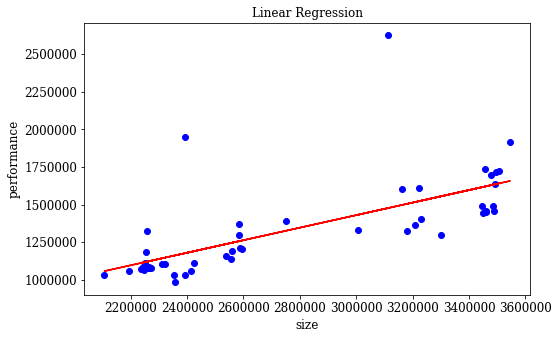

In [159]:
# Total berechnung hängt vom Datensatz ab, nicht nur von der Größe (param = 1)
# Change ratio nicht unbedingt


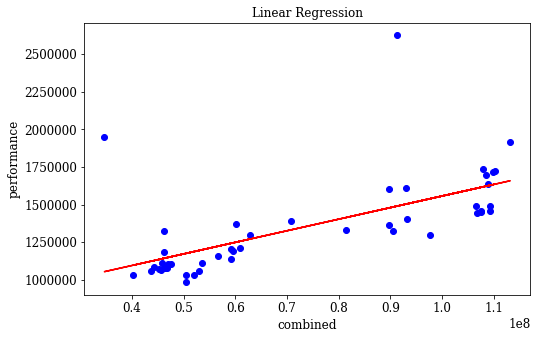

In [151]:
X = correlation_frame.iloc[:, 4:5].values 
y = correlation_frame.iloc[:, 0].values 
lin = LinearRegression() 

lin.fit(X, y) 
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel(correlation_frame.columns[4]) 
plt.ylabel(correlation_frame.columns[0]) 

plt.show() 

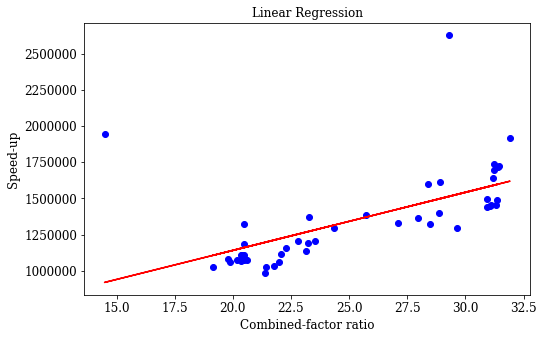

In [152]:
X = correlation_frame.iloc[:, 3:4].values 
y = correlation_frame.iloc[:, 0].values 
lin = LinearRegression() 

lin.fit(X, y) 
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Combined-factor ratio') 
plt.ylabel('Speed-up') 


plt.show() 